# Slightly compressible flow
In this tutorial we investigate how to use **PorePy** to solve slighlty compresible flow. <br>


**Note**: This tutorial will focus on a 2d domain, however most of the code works for 1d, 2d, and 3d domains.<br>

Let is $\Omega$ a regular domain with boundary $\partial \Omega$. The boundary can be divided in two non-overlapping parts useful to impose Dirichlet ($\partial \Omega_d$) and Neumann ($\partial \Omega_n$) boundary conditions. We indicate with $\mathbf{n}$ the outward unit normal vector of $\partial \Omega$.<br>
The single-phase flow can be written in primal formulation as:

$$ \phi\frac{\partial\rho}{\partial t}- \nabla \cdot \rho K \nabla p = \rho f $$
with boundary conditions on $\partial \Omega_d$ and $\partial \Omega_n$:
$$ p = p_b \qquad - K \nabla p \cdot \mathbf{n} = u_b$$

Where $\phi$ is the porosity, $\rho$ is the fluid density, $f$ is a scalar source/sink term, $K$ is the permeability matrix, $p_b$ is the pressure at the boundary (Dirichlet condition), and $u_p$ is the flux at the boundary (Neumann condition).<br>

As a relationship between pressure and density we use $c_p\rho = \text{d}\rho/\text{d}p$. Assuming slightly compressible flow (e.g., $\nabla\rho\cdot K\nabla p \ll 1$) we can write conservation of mass as

$$c_p\phi\frac{\partial p}{\partial t} - \nabla \cdot K \nabla p = f $$

We now discretize in time using backward Euler and time step $k$:
$$c_p\phi\frac{p^{k+1} - p^k}{k} - \nabla \cdot K \nabla p^{k+1} = f^{k+1} $$


# Import modules

First we have to import the modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from porepy.numerics.compressible.problems import SlightlyCompressible

from porepy.grids import structured
from porepy.viz import plot_grid

# Define problem:
We define our problem in the unit square. We let our problem inherit from the compressible problem base class to set default values.

In [2]:
class UnitSquareInjection(SlightlyCompressible):

    def __init__(self):
        nx = 11
        ny = 11

        physdims = [1, 1]

        g = structured.CartGrid([nx, ny], physdims=physdims)
        g.compute_geometry()
        self.g = g
        # Initialize base class
        SlightlyCompressible.__init__(self)

    #--------grid function--------
    
    def grid(self):
        return self.g

    #--------Inn/outflow terms---------------

    def source(self, t):
        f = np.zeros(self.g.num_cells)
        source_cell = round(self.g.num_cells / 2)
        f[source_cell] = 10*self.g.cell_volumes[source_cell]  # m**3/s
        return f * (t < .05)

    #--------Parameters------------
    
    def porosity(self):
        return  np.ones(self.g.num_cells)
    
    #--------Time stepping------------
    def time_step(self):
        return .001

    def end_time(self):
        return 0.1


We can now initialize the problem and solve

In [3]:
problem = UnitSquareInjection()
problem.solve()
pressures = problem.data['pressure']
problem.save_results()

And we plot the solution

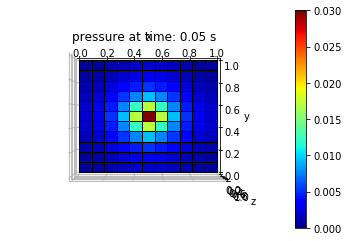

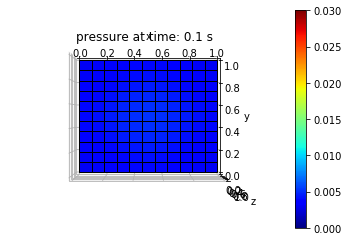

In [4]:
time_steps = [50,100]
dt = problem.time_step()

for t in time_steps:
    p = pressures[t]
    plot_grid.plot_grid(problem.g, p, color_map = [0, 0.03], if_plot=False)
    plt.title('pressure at time: %g s' %(t*dt))
    plt.show()
